## Normalizacja

In [1]:
data = read.csv("day.csv")
head(data)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [2]:
summary(data)

    instant             dteday        season            yr        
 Min.   :  1.0   2011-01-01:  1   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   2011-01-02:  1   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   2011-01-03:  1   Median :3.000   Median :1.0000  
 Mean   :366.0   2011-01-04:  1   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   2011-01-05:  1   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   2011-01-06:  1   Max.   :4.000   Max.   :1.0000  
                 (Other)   :725                                   
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.0

In [3]:
keeps <- c("temp","atemp",  "hum", "windspeed", "registered", "casual", "cnt")
df = data[keeps]
head(df)

temp,atemp,hum,windspeed,registered,casual,cnt
0.344167,0.363625,0.805833,0.1604460,654,331,985
0.363478,0.353739,0.696087,0.2485390,670,131,801
0.196364,0.189405,0.437273,0.2483090,1229,120,1349
0.200000,0.212122,0.590435,0.1602960,1454,108,1562
0.226957,0.229270,0.436957,0.1869000,1518,82,1600
0.204348,0.233209,0.518261,0.0895652,1518,88,1606


In [17]:
x <- df
normalized = (x-min(x))/(max(x)-min(x))
normalized = data.frame(normalized, 'season' = data$season)
normalized$cnt = data$cnt
head(normalized)
range(normalized)

temp,atemp,hum,windspeed,registered,casual,cnt,season
3.949587e-05,4.172883e-05,9.247567e-05,1.841244e-05,0.07505164,0.037984852,985,1
4.171196e-05,4.059433e-05,7.988146e-05,2.852180e-05,0.07688777,0.015033280,801,1
2.253431e-05,2.173571e-05,5.018051e-05,2.849541e-05,0.14103741,0.013770943,1349,1
2.295157e-05,2.434267e-05,6.775706e-05,1.839523e-05,0.16685793,0.012393849,1562,1
2.604510e-05,2.631053e-05,5.014425e-05,2.144824e-05,0.17420243,0.009410145,1600,1
2.345054e-05,2.676257e-05,5.947452e-05,1.027831e-05,0.17420243,0.010098692,1606,1


[1]    0 8714

In [18]:
write.csv(normalized, file = "day_normalized.csv")

### Standaryzacja

In [19]:
library(psycho)
library(tidyverse)

stnd <- df %>% 
  psycho::standardize() 

stnd$cnt = data$cnt
summary(stnd)

      temp              atemp               hum              windspeed      
 Min.   :-2.38324   Min.   :-2.42564   Min.   :-4.408468   Min.   :-2.1690  
 1st Qu.:-0.86479   1st Qu.:-0.83769   1st Qu.:-0.757528   1st Qu.:-0.7166  
 Median : 0.01611   Median : 0.07596   Median :-0.008615   Median :-0.1227  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 0.87425   3rd Qu.: 0.82380   3rd Qu.: 0.718353   3rd Qu.: 0.5513  
 Max.   : 2.00098   Max.   : 2.24926   Max.   : 2.419491   Max.   : 4.0901  
   registered            casual             cnt      
 Min.   :-2.330497   Min.   :-1.2324   Min.   :  22  
 1st Qu.:-0.742937   1st Qu.:-0.7758   1st Qu.:3152  
 Median : 0.003735   Median :-0.1969   Median :4548  
 Mean   : 0.000000   Mean   : 0.0000   Mean   :4504  
 3rd Qu.: 0.718041   3rd Qu.: 0.3609   3rd Qu.:5956  
 Max.   : 2.108517   Max.   : 3.7311   Max.   :8714  

In [20]:
head(stnd)

temp,atemp,hum,windspeed,registered,casual,cnt
-0.8260965,-0.6794808,1.2493159,-0.38762628,-1.924153,-0.7532181,985
-0.7206013,-0.7401455,0.4787852,0.74908882,-1.913899,-1.0444990,801
-1.6335382,-1.7485698,-1.3383576,0.74612099,-1.555624,-1.0605194,1349
-1.6136748,-1.6091685,-0.2630015,-0.38956182,-1.411417,-1.0779963,1562
-1.4664099,-1.5039409,-1.3405763,-0.04627497,-1.370398,-1.1158628,1600
-1.5899219,-1.4797695,-0.7697378,-1.30224238,-1.370398,-1.1071243,1606


In [25]:
write.csv(normalized, file = "day_stnd.csv")

In [26]:
cor(normalized)

,temp,atemp,hum,windspeed,registered,casual,cnt,season
temp,1.0000000,0.9917016,0.12696294,-0.1579441,0.5400120,0.54328466,0.6274940,0.3343149
atemp,0.9917016,1.0000000,0.13998806,-0.1836430,0.5441918,0.54386369,0.6310657,0.3428756
hum,0.1269629,0.1399881,1.00000000,-0.2484891,-0.0910886,-0.07700788,-0.1006586,0.2054448
windspeed,-0.1579441,-0.1836430,-0.24848910,1.0000000,-0.2174490,-0.16761335,-0.2345450,-0.2290463
registered,0.5400120,0.5441918,-0.09108860,-0.2174490,1.0000000,0.39528245,0.9455169,0.4116231
casual,0.5432847,0.5438637,-0.07700788,-0.1676133,0.3952825,1.00000000,0.6728044,0.2103992
cnt,0.6274940,0.6310657,-0.10065856,-0.2345450,0.9455169,0.67280443,1.0000000,0.4061004
season,0.3343149,0.3428756,0.20544476,-0.2290463,0.4116231,0.21039916,0.4061004,1.0000000


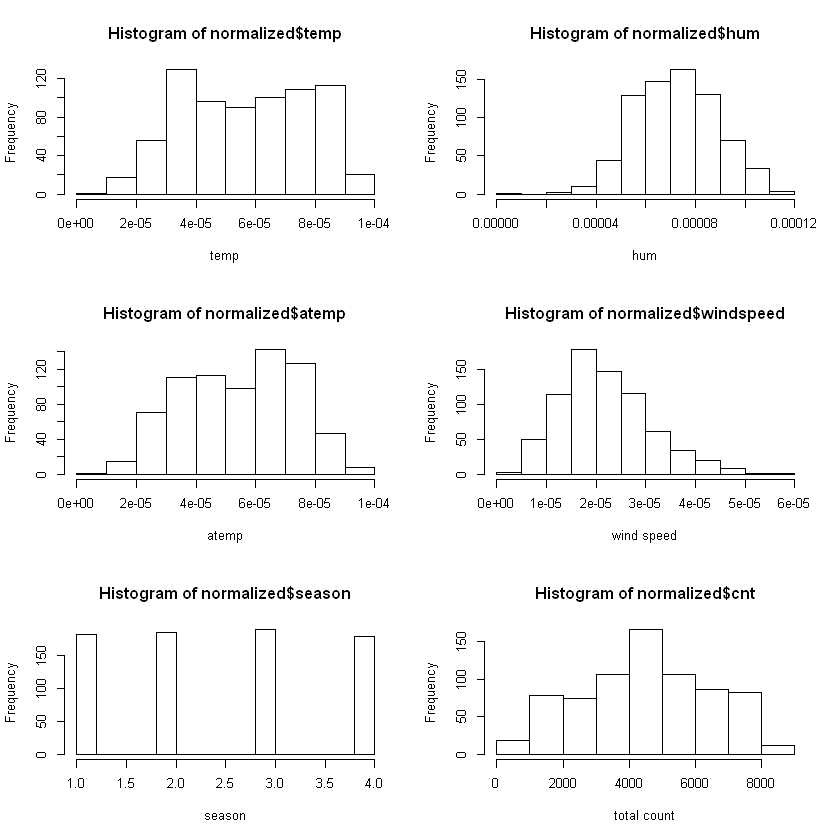

In [27]:
par(mfrow = c(3,2))

hist(normalized$temp, xlab = 'temp')
hist(normalized$hum, xlab = 'hum')
hist(normalized$atemp, xlab = 'atemp')
hist(normalized$windspeed, xlab = 'wind speed')
hist(normalized$season, xlab = 'season')
hist(normalized$cnt, xlab = 'total count')

## Dodaje kolumnę z procentowym udziałem zarejestrowanych userów w całości cnt wypozyczonych rowerow

In [28]:
data_p <- data.frame(normalized, 'registered' = (normalized$registered / normalized$cnt))
data_p$registered = data_p$registered.1
keeps <- c("temp","atemp",  "hum", "windspeed", "registered", "cnt", "season")
data_p = data_p[keeps]
head(data_p)

temp,atemp,hum,windspeed,registered,cnt,season
3.949587e-05,4.172883e-05,9.247567e-05,1.841244e-05,7.619456e-05,985,1
4.171196e-05,4.059433e-05,7.988146e-05,2.852180e-05,9.598972e-05,801,1
2.253431e-05,2.173571e-05,5.018051e-05,2.849541e-05,1.045496e-04,1349,1
2.295157e-05,2.434267e-05,6.775706e-05,1.839523e-05,1.068233e-04,1562,1
2.604510e-05,2.631053e-05,5.014425e-05,2.144824e-05,1.088765e-04,1600,1
2.345054e-05,2.676257e-05,5.947452e-05,1.027831e-05,1.084698e-04,1606,1


In [29]:
write.csv(data_p, file = "day_with_registered_percent")

## Wartości odstające

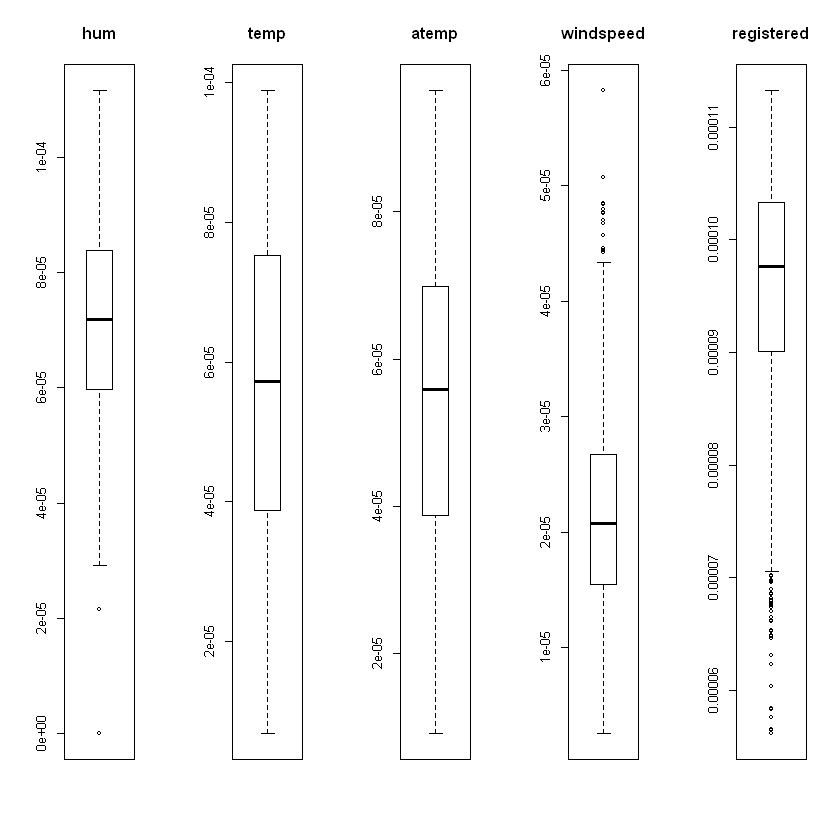

In [30]:
par(mfrow=c(1, 5))

boxplot(data_p$hum, main="hum")
boxplot(data_p$temp, main="temp")
boxplot(data_p$atemp, main="atemp")
boxplot(data_p$windspeed, main="windspeed")
boxplot(data_p$registered, main="registered")

In [31]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

withoutOutliers <- data.frame(
    'hum' = remove_outliers(data_p$hum),
    'temp' = remove_outliers(data_p$temp),
    'atemp' = remove_outliers(data_p$atemp),
    'windspeed' = remove_outliers(data_p$windspeed),
    'registered' = remove_outliers(data_p$registered),
    'season' = data_p$season,
    'cnt' = data_p$cnt)
head(withoutOutliers)

hum,temp,atemp,windspeed,registered,season,cnt
9.247567e-05,3.949587e-05,4.172883e-05,1.841244e-05,7.619456e-05,1,985
7.988146e-05,4.171196e-05,4.059433e-05,2.852180e-05,9.598972e-05,1,801
5.018051e-05,2.253431e-05,2.173571e-05,2.849541e-05,1.045496e-04,1,1349
6.775706e-05,2.295157e-05,2.434267e-05,1.839523e-05,1.068233e-04,1,1562
5.014425e-05,2.604510e-05,2.631053e-05,2.144824e-05,1.088765e-04,1,1600
5.947452e-05,2.345054e-05,2.676257e-05,1.027831e-05,1.084698e-04,1,1606


In [32]:
# Jak dobrze liczę strasznie dużo się usunęło... powinno być do 10%

removed_rate <- 100 * (1 - (length(withoutOutliers) / length(data)))

print(removed_rate)

[1] 56.25


In [33]:
summary(withoutOutliers)

      hum                 temp               atemp             windspeed      
 Min.   :0.0000292   Min.   :6.786e-06   Min.   :9.074e-06   Min.   :3.0e-06  
 1st Qu.:0.0000599   1st Qu.:3.868e-05   1st Qu.:3.877e-05   1st Qu.:1.5e-05  
 Median :0.0000720   Median :5.719e-05   Median :5.586e-05   Median :2.1e-05  
 Mean   :0.0000722   Mean   :5.685e-05   Mean   :5.444e-05   Mean   :2.1e-05  
 3rd Qu.:0.0000838   3rd Qu.:7.521e-05   3rd Qu.:6.984e-05   3rd Qu.:2.6e-05  
 Max.   :0.0001116   Max.   :9.888e-05   Max.   :9.650e-05   Max.   :4.3e-05  
 NA's   :2                                                   NA's   :13       
   registered          season           cnt      
 Min.   :0.00007   Min.   :1.000   Min.   :  22  
 1st Qu.:0.00009   1st Qu.:2.000   1st Qu.:3152  
 Median :0.00010   Median :3.000   Median :4548  
 Mean   :0.00010   Mean   :2.497   Mean   :4504  
 3rd Qu.:0.00010   3rd Qu.:3.000   3rd Qu.:5956  
 Max.   :0.00011   Max.   :4.000   Max.   :8714  
 NA's   :36       

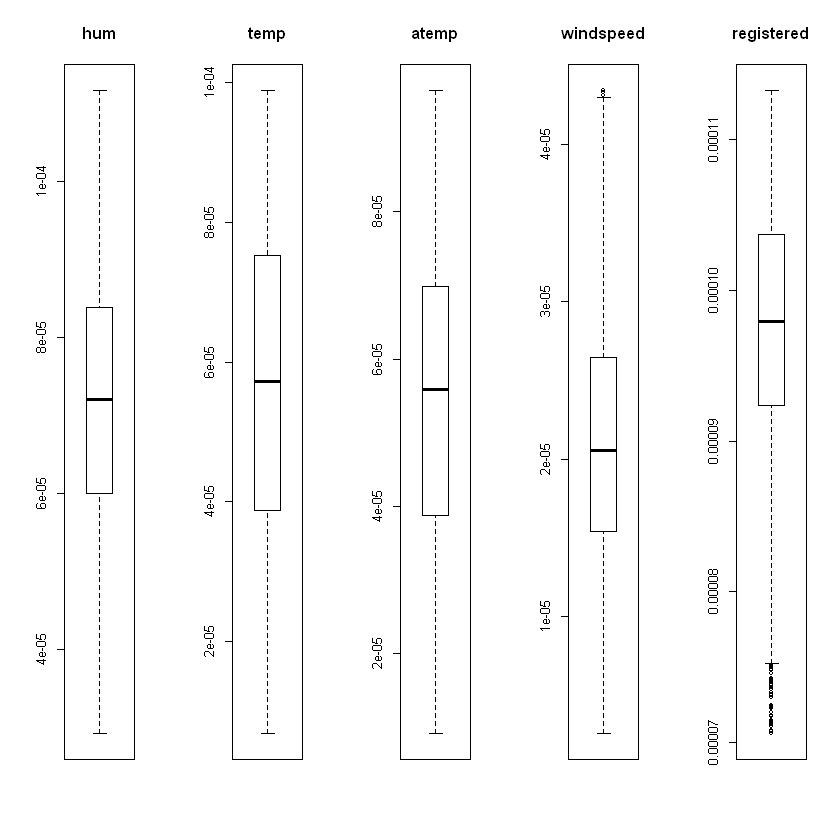

In [34]:
par(mfrow=c(1, 5))

boxplot(withoutOutliers$hum, main="hum")
boxplot(withoutOutliers$temp, main="temp")
boxplot(withoutOutliers$atemp, main="atemp")
boxplot(withoutOutliers$windspeed, main="windspeed")
boxplot(withoutOutliers$registered, main="registered")

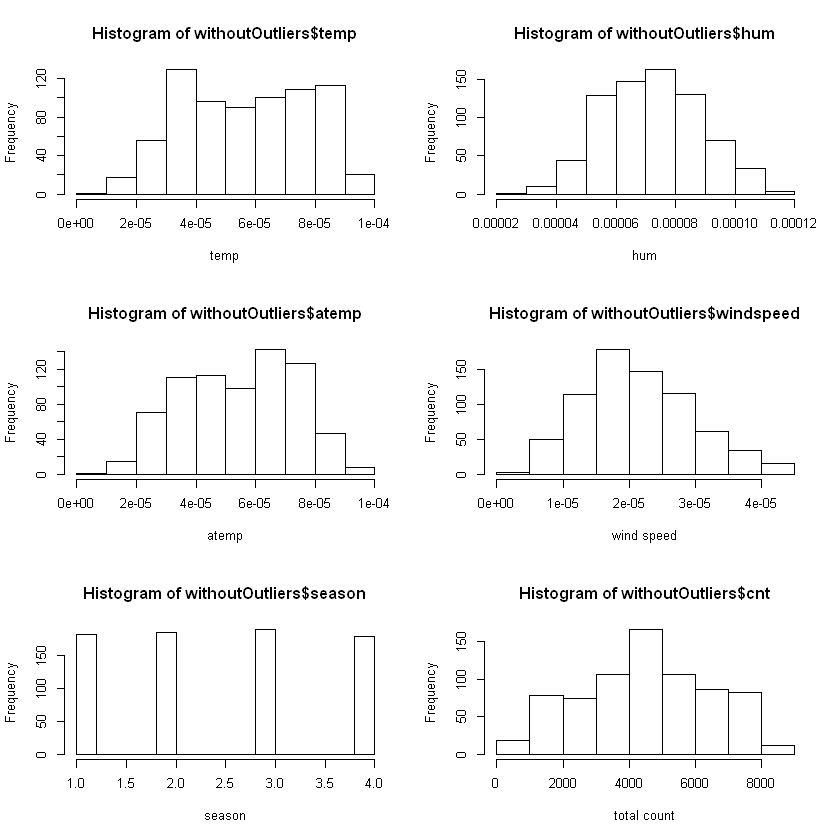

In [35]:
par(mfrow = c(3,2))

hist(withoutOutliers$temp, xlab = 'temp')
hist(withoutOutliers$hum, xlab = 'hum')
hist(withoutOutliers$atemp, xlab = 'atemp')
hist(withoutOutliers$windspeed, xlab = 'wind speed')
hist(withoutOutliers$season, xlab = 'season')
hist(withoutOutliers$cnt, xlab = 'total count')

Metoda forward


Call:
lm(formula = withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered)

Residuals:
    Min      1Q  Median      3Q     Max 
-4398.6 -1074.9   -63.9  1092.3  3445.2 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.793e+03  7.006e+02   6.841 1.76e-11 ***
withoutOutliers$temp        1.671e+07  2.018e+07   0.828   0.4080    
withoutOutliers$atemp       4.421e+07  2.283e+07   1.937   0.0532 .  
withoutOutliers$hum        -2.990e+07  3.535e+06  -8.458  < 2e-16 ***
withoutOutliers$windspeed  -3.916e+07  6.954e+06  -5.630 2.64e-08 ***
withoutOutliers$registered -6.385e+06  5.750e+06  -1.110   0.2672    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1420 on 675 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.4673,	Adjusted R-squared:  0.4633 


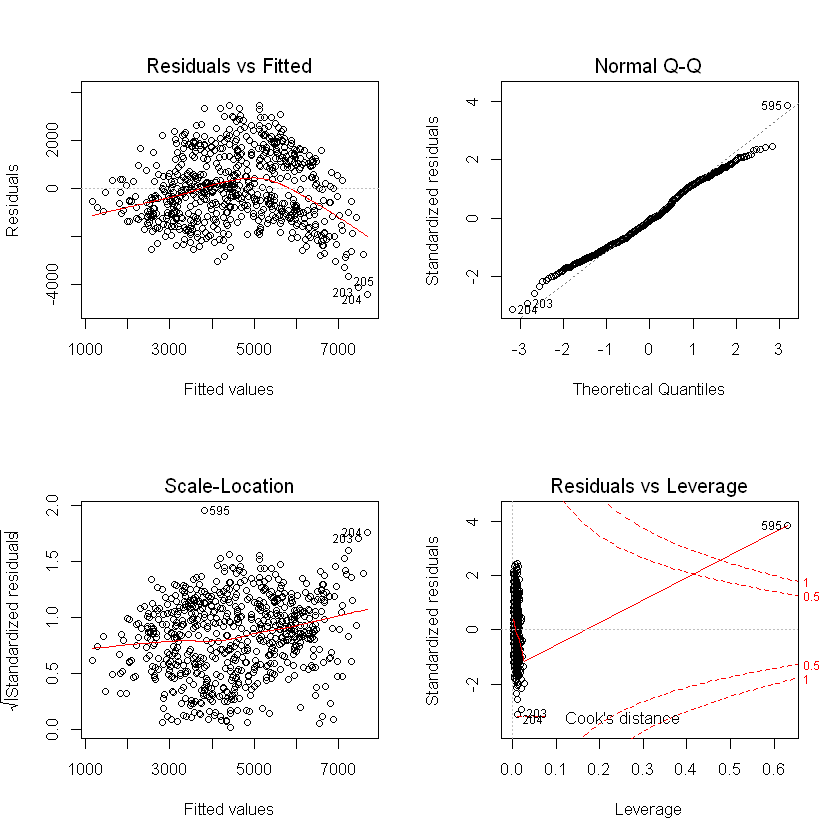

In [36]:
model <- lm(withoutOutliers$cnt~withoutOutliers$temp + withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered)
summary(model)
par(mfrow=c(2, 2))
plot(model)

In [37]:
model.forward <- step(model, direction="forward", trace=1, scope= ~withoutOutliers$temp + withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered)

Start:  AIC=9891.87
withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered



In [38]:
write.csv(withoutOutliers, file = "day_final")

## DFFITS

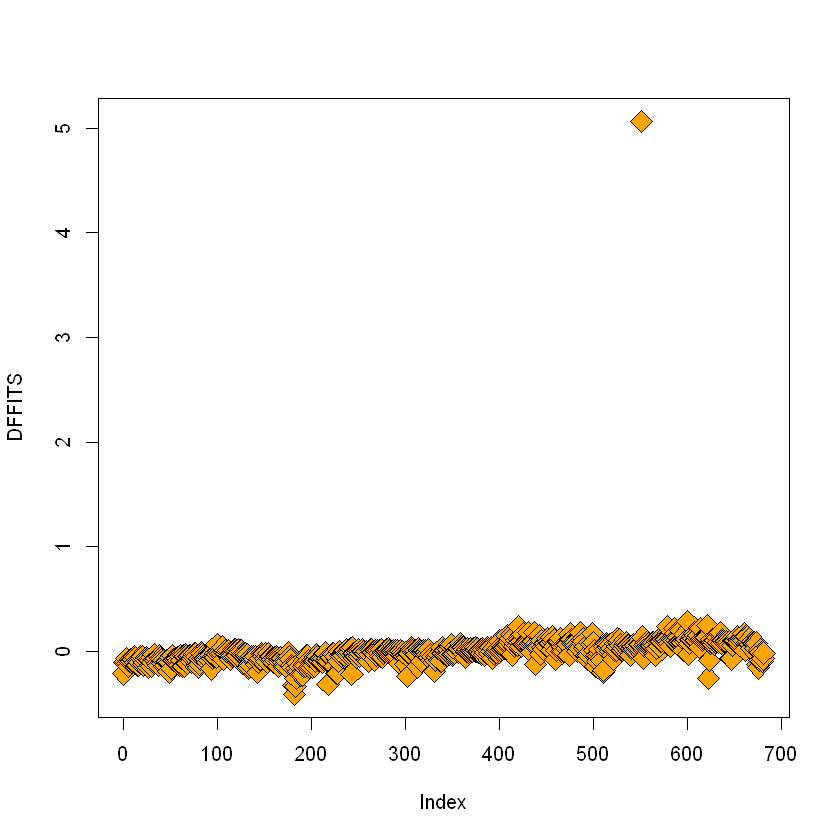

In [39]:
model <- lm(withoutOutliers$cnt~withoutOutliers$temp + withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered)
plot(dffits(model), pch=23, bg='orange', cex=2, ylab="DFFITS")

wybranie rekordów z wiekszym od progu

In [42]:
print(withoutOutliers[which(abs(dffits(model)) > 0.5),])

            hum         temp        atemp    windspeed   registered season  cnt
551 6.18258e-05 9.056312e-05 8.404143e-05 1.548657e-05 7.504293e-05      3 7403
